In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
from download_utils import download_daily_weather, combine_daily_weather
from output_utils import plot_heatmap_on_map
import xarray as xr
import geopandas
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import numpy as np
import hopsworks
import re
import os

In [3]:
save = False
plot = True

# Overview
This notebook is run every 3 days. Weather data is downloaded at daily resolution and averaged from the start of the month up to the current day. This is to get a better estimate for the weather variables every 3 days.

# Download weather data

In [4]:
end = pd.Timestamp.today().normalize() - pd.Timedelta(days=7)
start = end.replace(day=1) - relativedelta(months=2) ## -2 months to be able to create lagged features
print("Start of forecast estimate: ", start)
print("End of forecast estimate: ", end)

Start of forecast estimate:  2025-10-01 00:00:00
End of forecast estimate:  2025-12-29 00:00:00


In [5]:
# date_range = pd.date_range(start, end)

# # Group dates by year-month and get only the days in the range
# year_month_days = {}
# for date in date_range:
#     year_month = (date.year, date.month)
#     if year_month not in year_month_days:
#         year_month_days[year_month] = []
#     year_month_days[year_month].append(date.day)

# i = 0
# # Make a separate request for each year-month combination
# for i in sorted(year_month_days.items(), reverse=True):
#     print(i)

In [7]:
for _ in range(3):
    try:
        download_daily_weather(start, end)
    except:
        continue


2026-01-05 18:12:45,988 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


2026-01-05 18:12:45,988 INFO: [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


2026-01-05 18:12:46,200 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)


2026-01-05 18:12:46,200 INFO: [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)


2026-01-05 18:12:46,202 INFO Request ID is 7e0a0e4a-c2d6-4e5c-8da6-2d8768a349df


2026-01-05 18:12:46,202 INFO: Request ID is 7e0a0e4a-c2d6-4e5c-8da6-2d8768a349df


2026-01-05 18:12:46,283 INFO status has been updated to accepted


2026-01-05 18:12:46,283 INFO: status has been updated to accepted


2026-01-05 18:13:07,587 INFO status has been updated to successful


2026-01-05 18:13:07,587 INFO: status has been updated to successful
2026-01-05 18:13:07,743 INFO: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2026-01-04/e57acdf621d7a8c17a9ca3894c166fc7.zip


2026-01-05 18:13:10,670 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)



 Downloaded month 10 in 2025 

2026-01-05 18:13:10,670 INFO: [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)


2026-01-05 18:13:10,671 INFO Request ID is 35fabda7-923a-46d5-9a17-c07319fdf42c


2026-01-05 18:13:10,671 INFO: Request ID is 35fabda7-923a-46d5-9a17-c07319fdf42c


2026-01-05 18:13:10,737 INFO status has been updated to accepted


2026-01-05 18:13:10,737 INFO: status has been updated to accepted


2026-01-05 18:13:31,996 INFO status has been updated to successful


2026-01-05 18:13:31,996 INFO: status has been updated to successful
2026-01-05 18:13:32,131 INFO: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2025-12-30/1f954dc03c69c9a177f92dbe6e393ac3.zip



 Downloaded month 11 in 2025 



2026-01-05 18:13:33,543 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)


2026-01-05 18:13:33,543 INFO: [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-timeseries?tab=overview)


2026-01-05 18:13:33,544 INFO Request ID is 363ed494-a4bb-4ce9-8011-2e2c6db1b59a


2026-01-05 18:13:33,544 INFO: Request ID is 363ed494-a4bb-4ce9-8011-2e2c6db1b59a


2026-01-05 18:13:33,608 INFO status has been updated to accepted


2026-01-05 18:13:33,608 INFO: status has been updated to accepted


2026-01-05 18:13:47,192 INFO status has been updated to successful


2026-01-05 18:13:47,192 INFO: status has been updated to successful
2026-01-05 18:13:47,331 INFO: Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-1/2026-01-05/22529e68b69cebd0089fb993659085d0.zip



 Downloaded month 12 in 2025 



In [ ]:
weather_daily = combine_daily_weather()

# Sort by time to ensure monotonic index (required for resampling)
weather_daily = weather_daily.sortby('valid_time')

weather_daily

<xarray.Dataset> Size: 37MB
Dimensions:     (valid_time: 90, latitude: 146, longitude: 141)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 720B 2025-10-01T12:00:00 ... 2025...
  * latitude    (latitude) float64 1kB 69.5 69.4 69.3 69.2 ... 55.2 55.1 55.0
  * longitude   (longitude) float64 1kB 10.5 10.6 10.7 10.8 ... 24.3 24.4 24.5
    expver      (valid_time) <U4 1kB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    t2m         (valid_time, latitude, longitude) float32 7MB nan nan ... 274.5
    tp          (valid_time, latitude, longitude) float32 7MB nan ... 0.0006544
    swvl1       (valid_time, latitude, longitude) float32 7MB nan nan ... 0.368
    swvl2       (valid_time, latitude, longitude) float32 7MB nan nan ... 0.3713
    ssrd        (valid_time, latitude, longitude) float32 7MB nan ... 1.327e+06
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-04T18:46 GRIB to CDM+CF via cfgrib-0.9.1...

# Prepare dataset for model input

### Average into monthly statistics
This is to transform the data into the same format as our backfill datasets.

In [22]:
weather_agg = weather_daily.resample(valid_time='MS').map(
    lambda x: xr.Dataset({
        "t2m": x["t2m"].mean(dim="valid_time"),
        "tp": x["tp"].sum(dim="valid_time"),
        "swvl1": x["swvl1"].mean(dim="valid_time"),
        "swvl2": x["swvl2"].mean(dim="valid_time"),
        "ssrd": x["ssrd"].sum(dim="valid_time"),
    })
)
weather_agg


<xarray.Dataset> Size: 1MB
Dimensions:     (latitude: 146, longitude: 141, valid_time: 3)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 1kB 69.5 69.4 69.3 69.2 ... 55.2 55.1 55.0
  * longitude   (longitude) float64 1kB 10.5 10.6 10.7 10.8 ... 24.3 24.4 24.5
  * valid_time  (valid_time) datetime64[ns] 24B 2025-10-01 2025-11-01 2025-12-01
Data variables:
    t2m         (valid_time, latitude, longitude) float32 247kB nan ... 275.8
    tp          (valid_time, latitude, longitude) float32 247kB 0.0 ... 0.0177
    swvl1       (valid_time, latitude, longitude) float32 247kB nan ... 0.3932
    swvl2       (valid_time, latitude, longitude) float32 247kB nan ... 0.3948
    ssrd        (valid_time, latitude, longitude) float32 247kB 0.0 ... 2.399...

In [10]:
# from download_utils import era5_grid_to_points_df

# era5_grid_df = era5_grid_to_points_df(weather_agg)
# era5_grid_df.to_csv('../data/country/era5points_df.csv', index=False)

### Create lagged features

In [23]:
# Convert to dataframe for easier manipulation
weather_features = weather_agg.to_dataframe().reset_index()
weather_features = weather_features.sort_values(['latitude', 'longitude', 'valid_time']).reset_index(drop=True)

# Create lagged features for each lat/lon combination
max_lag = 2
weather_vars = ['t2m', 'tp', 'swvl1', 'swvl2', 'ssrd']

# Group by location and create lags
lagged_data = []
for (lat, lon), group in weather_features.groupby(['latitude', 'longitude']):
    group = group.sort_values('valid_time').reset_index(drop=True)
    
    # Lagged features
    for lag in range(1, max_lag + 1):
        for var in weather_vars:
            group[f'{var}_lag{lag+1}'] = group[var].shift(lag)
    
    lagged_data.append(group)

In [24]:
weather_final = pd.concat(lagged_data, ignore_index=True)
weather_final.dropna(inplace=True)
weather_final.drop(columns=['number'], inplace=True)

d = {}
for v in weather_vars:
    d[v] = v+'_lag1'
d['latitude'] = 'Lat'
d['longitude'] = 'Lon'

weather_final.rename(columns=d, inplace=True)
weather_final = weather_final[sorted(list(weather_final.columns))]
weather_final["Lon"] = np.round(weather_final["Lon"], 1)
weather_final["Lat"] = np.round(weather_final["Lat"], 1)
weather_final.rename(columns={'valid_time':'Month'}, inplace=True)

weather_final

,Lat,Lon,ssrd_lag1,ssrd_lag2,ssrd_lag3,swvl1_lag1,swvl1_lag2,swvl1_lag3,swvl2_lag1,swvl2_lag2,swvl2_lag3,t2m_lag1,t2m_lag2,t2m_lag3,tp_lag1,tp_lag2,tp_lag3,Month
2,55.0,10.5,29545434.0,57946732.0,111332144.0,0.366178,0.364955,0.334737,0.367255,0.358120,0.318441,279.304138,280.878693,285.606628,0.015358,0.023522,0.073831,2025-12-01
5,55.0,10.6,29590414.0,57983484.0,111310336.0,0.365949,0.364825,0.334389,0.367115,0.358065,0.318485,279.295319,280.877899,285.596375,0.015353,0.023587,0.073856,2025-12-01
47,55.0,12.0,31710750.0,60494504.0,119752568.0,0.361793,0.364880,0.338017,0.363276,0.360316,0.324853,279.141693,280.636353,285.318695,0.011384,0.018314,0.056101,2025-12-01
50,55.0,12.1,31788526.0,60590808.0,119974560.0,0.362081,0.365382,0.339502,0.363441,0.360626,0.325493,279.152344,280.640076,285.305481,0.011488,0.018848,0.055625,2025-12-01
56,55.0,12.3,32049008.0,61268528.0,121889248.0,0.240094,0.244547,0.228525,0.243999,0.243248,0.218416,279.260162,280.680176,285.278259,0.010895,0.020913,0.055053,2025-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61745,69.5,24.1,0.0,4534644.0,43640832.0,0.217069,0.239728,0.252815,0.218989,0.245201,0.252953,265.630188,266.006348,275.279633,0.030968,0.016455,0.031202,2025-12-01
61748,69.5,24.2,0.0,4521106.0,43597824.0,0.219375,0.241172,0.252348,0.219871,0.246002,0.252164,265.673767,266.071503,275.341827,0.031301,0.016693,0.031450,2025-12-01
61751,69.5,24.3,0.0,4507432.0,43554632.0,0.221558,0.242586,0.251933,0.220722,0.246811,0.251439,265.718018,266.135895,275.402313,0.031636,0.016932,0.031698,2025-12-01
61754,69.5,24.4,0.0,4489310.0,43511024.0,0.220443,0.242842,0.253278,0.220460,0.247090,0.252991,265.635223,266.097565,275.432983,0.031959,0.017148,0.031927,2025-12-01


In [25]:
for var in weather_final.columns:
    if var not in ["Lat", "Lon", "Month"]:
        weather_final[var] = weather_final[var].astype("float64")

weather_final.columns = [c.lower() for c in weather_final.columns]
weather_final['month'] = weather_final['month'].dt.tz_localize(None)

In [27]:
if save: weather_final.to_csv('../data/weather_daily/weather_' + str(end.day) + '_' + str(end.month) + '_' + str(end.year) + '_.csv', index=False)

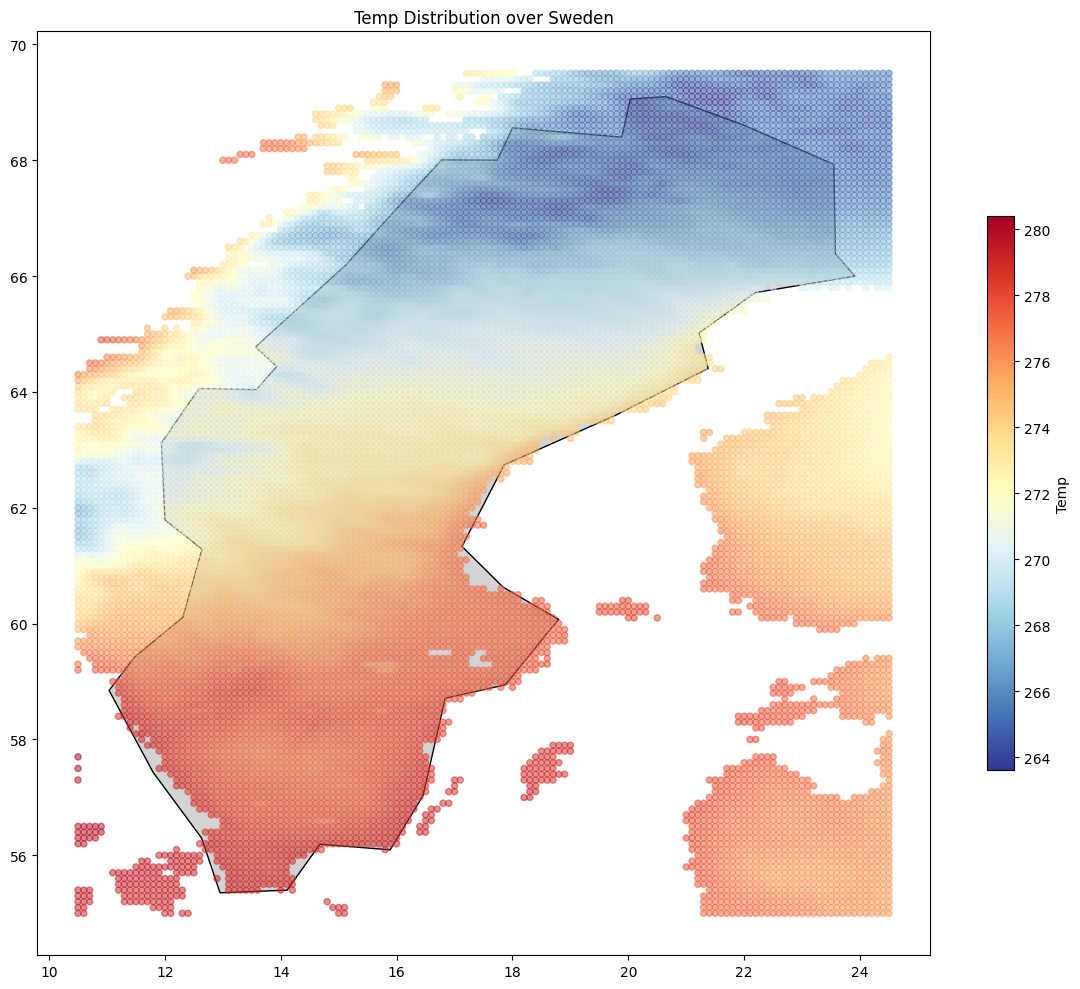

In [ ]:
# Only plot if running locally (not in CI/CD)
if 'GITHUB_ACTIONS' not in os.environ:
    plot_heatmap_on_map(weather_final, 't2m_lag1', 'Temp')
else:
    print("Skipping plot generation in CI/CD")

# Add to Hopsworks

In [28]:
project = hopsworks.login()
fs = project.get_feature_store() 

2026-01-05 18:59:58,478 INFO: Closing external client and cleaning up certificates.
Connection closed.
2026-01-05 18:59:58,480 INFO: Initializing external client
2026-01-05 18:59:58,481 INFO: Base URL: https://c.app.hopsworks.ai:443


2026-01-05 18:59:59,814 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1286351


In [ ]:
# Retrieve feature groups
weather_fg = fs.get_or_create_feature_group(
    name='weather',
    primary_key=['lat', 'lon', 'month'],
    version=2,
    stream=False,
)

# Ensure Month is datetime type for Hopsworks
weather_final['month'] = pd.to_datetime(weather_final['month']).dt.tz_localize(None)

weather_fg.insert(weather_final, write_options={"wait_for_job": True})

Uploading Dataframe: 100.00% |██████████| Rows 13209/13209 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: weather_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1286351/jobs/named/weather_2_offline_fg_materialization/executions
2026-01-05 19:00:17,520 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2026-01-05 19:00:20,706 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2026-01-05 19:00:23,887 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2026-01-05 19:02:11,903 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2026-01-05 19:02:18,440 INFO: Waiting for log aggregation to finish.
2026-01-05 19:02:27,706 INFO: Execution finished successfully.


(Job('weather_2_offline_fg_materialization', 'SPARK'), None)